### ShapDA: combining domain invariant features for Glucose and Lactic acid

In [3]:

import numpy as np
from sklearn.model_selection import train_test_split
from traintest import *
from dataloader import DataLoad
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 1. Predicting Glucose: using combined domain-invariant features to train on source data and test on unseen source and ulabeled target data

In [7]:
D = DataLoad(dataset='glucose')
D.load_data()
Xs, ys, Xt, yt, wl = D.X_source, D.y_source, D.X_target, D.y_target, D.wl
modelnames=['PLSR']#,

In [5]:
glucose_features =  np.loadtxt('./results/feature_index_ranked_glucose.txt', delimiter=',')
lacticacid_features =  np.loadtxt('./results/feature_index_ranked_lacticacid.txt', delimiter=',')

There are 39 unique features from combined domain invariant features


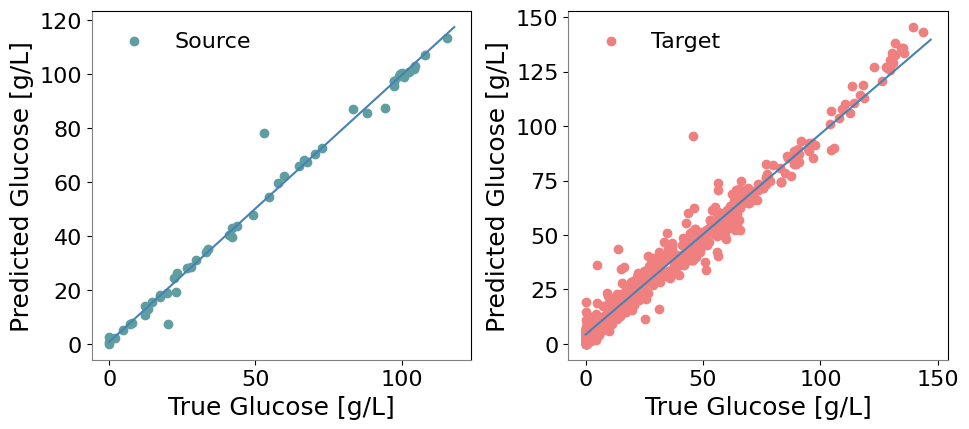

  Test on Model  R-sq RMSE RMSEP [%]  RPD
0  Source  PLSR  0.99  4.2       3.6  8.7
1  Target  PLSR  0.96  6.1       4.2  5.1


In [20]:
dif_comb = np.sort(np.unique(np.append(glucose_features[:18], lacticacid_features[:21]))).astype(int)
print(f"There are {len(dif_comb)} unique features from combined domain invariant features")
# take only combined domain invariant features
Xs_difG,  Xt_difG, wl_dif = Xs[:,dif_comb], Xt[:,dif_comb], wl[dif_comb]
Xs_trainG, Xs_testG, ys_trainG, ys_testG = train_test_split(Xs_difG, ys, test_size=0.2, random_state=42)
models = train(Xs_trainG, ys_trainG,modelnames=modelnames, plsr_comp=12)
print(test(models, Xs_testG, ys_testG, Xt_difG, yt, target='Glucose'))

### 2. Predicting Glucose: using combined domain-invariant features to train on source data and test on unseen source and ulabeled target data

In [12]:
D = DataLoad(dataset='lacticacid')
D.load_data()
XsL, ysL, XtL, ytL, wl = D.X_source, D.y_source, D.X_target, D.y_target, D.wl

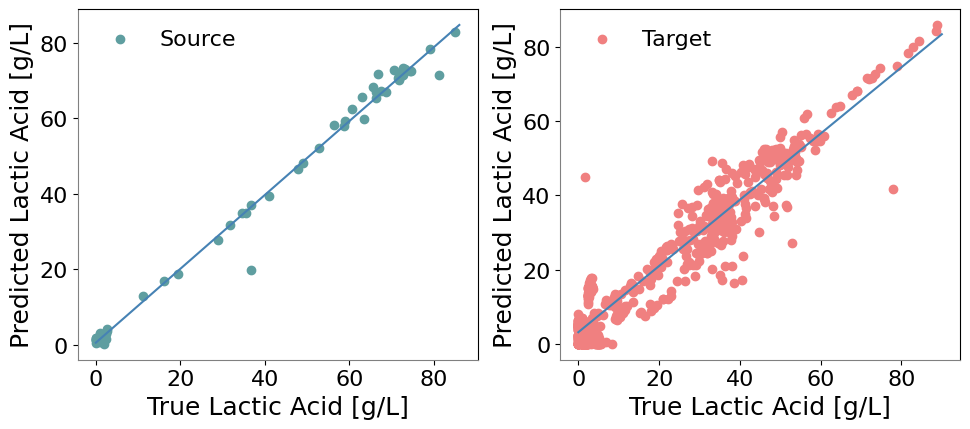

  Test on Model  R-sq RMSE RMSEP [%]  RPD
0  Source  PLSR  0.99  3.1       3.6  9.9
1  Target  PLSR  0.91  6.1       6.9  3.3


In [25]:
# take only combined domain invariant features
Xs_difL, Xt_difL,  wl_dif = XsL[:,dif_comb], XtL[:,dif_comb],  wl[dif_comb]
Xs_trainL, Xs_testL, ys_trainL, ys_testL = train_test_split(Xs_difL, ysL, test_size=0.2, random_state=42)
models = train(Xs_trainL, ys_trainL, modelnames=modelnames, plsr_comp=12)
print(test(models, Xs_testL, ys_testL, Xt_difL, ytL))